## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.info()
# пропущенных значений нет, все признаки не категориальные (по смыслу и по факту)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
'''StandartScaler почему-то не импортируется, поэтому я просто напишу самостоятельно'''
# Предупреждение о будущей поддержке, поэтому на решение оно не влияет и это не ошибка
from sklearn.neighbors import KNeighborsClassifier
class Scaler:
    def fit(self, X: np.array) -> None:
        self.mu = X.mean(axis=0)
        self.sigma = X.std(axis=0)
        
    def transform(self, X: np.array) -> np.array:
        return (X - self.mu[np.newaxis, :]) / self.sigma[np.newaxis, :]
    
scaler = Scaler()
scaler.fit(x_train)
x_train_transformed = scaler.transform(x_train)
scaler.fit(x_test)
x_test_transformed = scaler.transform(x_test)
neighbours = [1, 3, 5, 10, 15, 25]
clfs = []
for k in neighbours:
    y_predicted_test = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(x_train_transformed[['alcohol', 'magnesium']], y_train).predict(x_test_transformed[['alcohol', 'magnesium']])
    y_predicted_train = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(x_train_transformed[['alcohol', 'magnesium']], y_train).predict(x_train_transformed[['alcohol', 'magnesium']])
    knn = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    clfs.append(knn)
    print(f'Accuracy for {k} neighbors for test is: {np.mean(y_predicted_test==y_test):.3f}', 
            f'Accuracy for {k} neighbors for train is: {np.mean(y_predicted_train==y_train):.3f}')


Accuracy for 1 neighbors for test is: 0.630 Accuracy for 1 neighbors for train is: 0.992
Accuracy for 3 neighbors for test is: 0.648 Accuracy for 3 neighbors for train is: 0.855
Accuracy for 5 neighbors for test is: 0.648 Accuracy for 5 neighbors for train is: 0.782
Accuracy for 10 neighbors for test is: 0.648 Accuracy for 10 neighbors for train is: 0.766
Accuracy for 15 neighbors for test is: 0.648 Accuracy for 15 neighbors for train is: 0.718
Accuracy for 25 neighbors for test is: 0.741 Accuracy for 25 neighbors for train is: 0.718


<ipython-input-5-69205c5bbb3e>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return (X - self.mu[np.newaxis, :]) / self.sigma[np.newaxis, :]


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [6]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [7]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

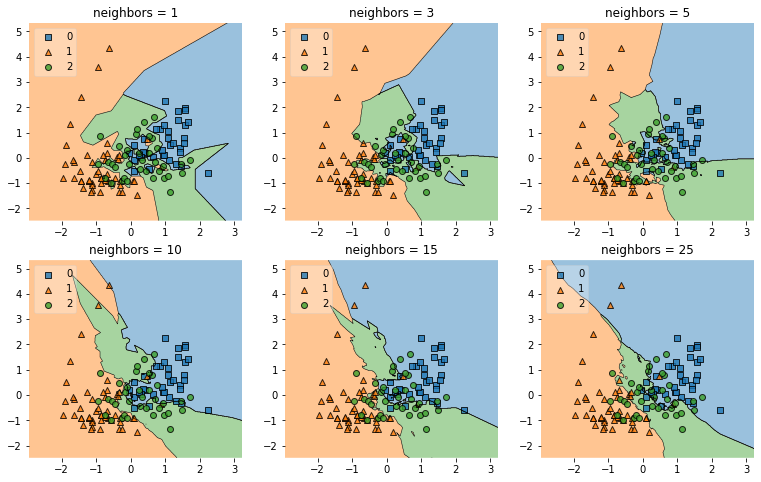

In [8]:
from mlxtend.plotting import plot_decision_regions
import itertools
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(13,8))
labels = ['neighbors = 1', 'neighbors = 3', 'neighbors = 5', 'neighbors = 10', 'neighbors = 15', 'neighbors = 25']
for clf, lab, grd in zip(clfs,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    clf.fit(x_train_transformed[['alcohol', 'magnesium']], y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=pd.DataFrame.to_numpy(x_train_transformed[['alcohol', 'magnesium']]), y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

 По моему отнюдь не скромному мнению, оптимальное число соседей - 5 
 По той простой причине, что экьюреси там достойное, но переобучения не наблюдается, и на графиках прослеживается допустимый (по субъективной оценке) объем ошибок
 

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

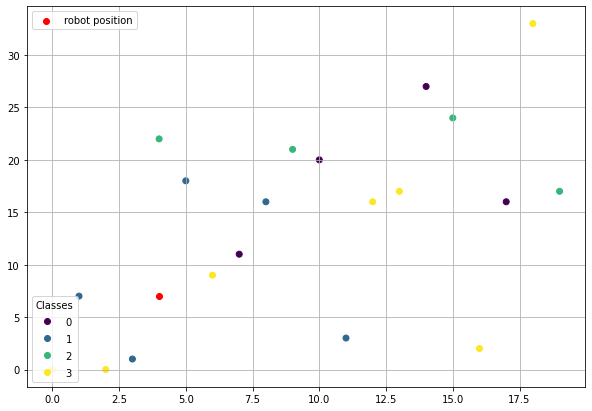

In [9]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = initial_position
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
        self.landmark = landmarks
        self.classes = classes
        self.initial_position = initial_position
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        
        self.knn.fit(self.landmark, self.classes)
        prediction = self.knn.predict([self.initial_position])
        if np.random.binomial(1, 0.8, 1) == 1:
            self.initial_position = self.initial_position + self.mapping[prediction.sum()]
            self.trajectory = np.vstack((self.trajectory, self.initial_position))
        else:
            self.initial_position = self.initial_position + self.mapping[0]
            self.trajectory = np.vstack((self.trajectory, self.initial_position))

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [12]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

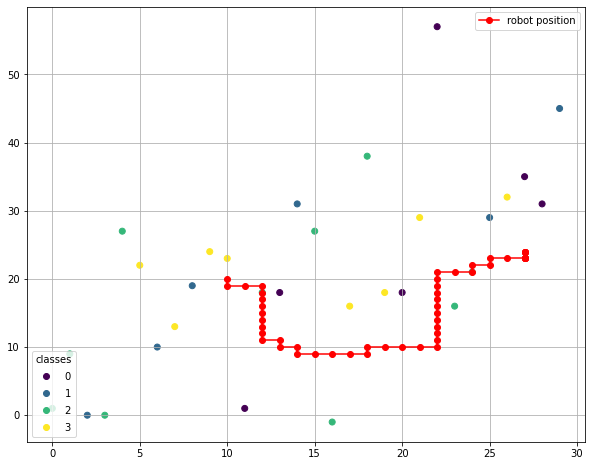

In [13]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

Количество соседей относительно несильно влияет на нашу траекторию (все равно прослеживается движение вправо) 
Однако, стоит заметить, что траектории не идентичны, потому что разное количество соседей выдает нам разный класс из-за различной концентрации точек

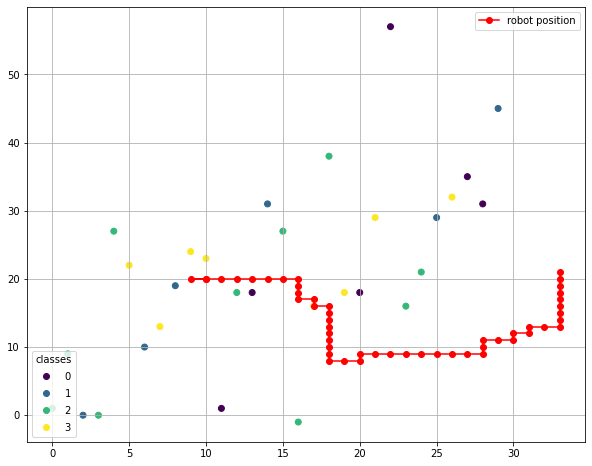

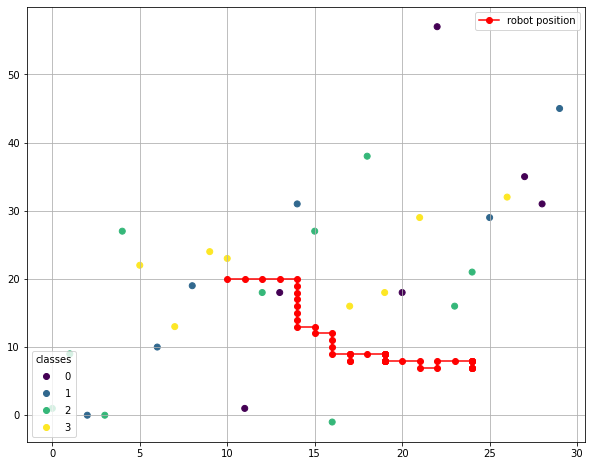

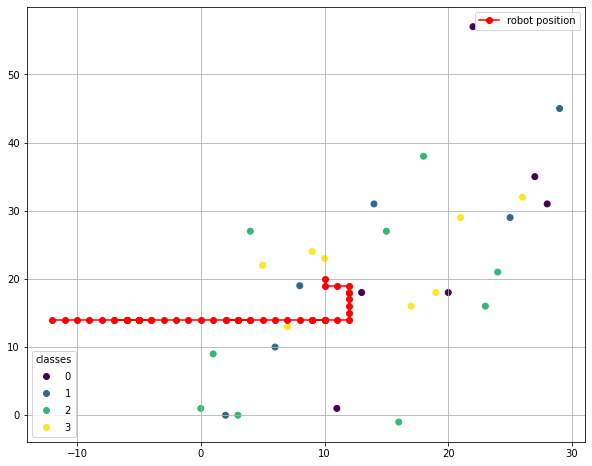

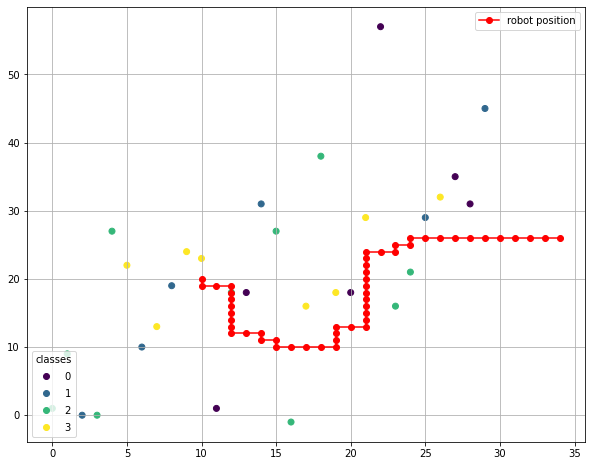

In [14]:
conduct_experiment(x, mean = 3, std = 10, k = 3, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 4, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 6, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 9, n_movements = 50)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [15]:
data = pd.read_csv('/Users/andreydyadyunov/Downloads/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [16]:
data.isnull().sum()
# Пропущенных значений нет

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [17]:
# Бессмысленный столбец unnamed
data = data.drop('Unnamed: 0', axis=1)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [18]:
matcorr = data.corrwith(data['price'])
matcorr
# По матрице корреляций видно, что меньше всего коррелируют с целевой переменной признаки
# depth, table
# Остальные признаки коррелируют сильно

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
dtype: float64

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [19]:
features = ['cut', 'color', 'clarity']
data = pd.get_dummies(data, prefix=features)
data

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [20]:
F = data.drop('price', axis=1)
A = data['price']
f_train, f_test, a_train, a_test = train_test_split(F, A, test_size = 0.3, random_state=6)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [21]:
#from sklearn.preprocessing import StandardScaler 
# Все равно не импортируется, воспользуемся прошлым
# Вылезает предупреждение, но это не страшно, в этой версии все еще работает
scaler = Scaler() 
f_train_transformed = f_train[['carat', 'depth', 'table', 'x', 'y', 'z']]
f_train = f_train.drop(['carat', 'depth', 'table', 'x', 'y', 'z'], axis=1)
scaler.fit(f_train_transformed)
f_train_transformed = scaler.transform(f_train_transformed)
f_train_transformed = f_train_transformed.merge(f_train, left_index=True, right_index=True)
f_test_transformed = f_test[['carat', 'depth', 'table', 'x', 'y', 'z']]
f_test = f_test.drop(['carat', 'depth', 'table', 'x', 'y', 'z'], axis=1)
scaler.fit(f_test_transformed)
f_test_transformed = scaler.transform(f_test_transformed)
f_test_transformed = f_test_transformed.merge(f_test, left_index=True, right_index=True)
f_test_transformed

<ipython-input-5-69205c5bbb3e>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return (X - self.mu[np.newaxis, :]) / self.sigma[np.newaxis, :]


,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
9359,0.429324,1.287023,2.013199,0.509620,0.457309,0.619825,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9490,0.640986,-1.139544,2.013199,0.823334,0.863686,0.647369,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
27,-1.052311,0.316396,-0.211031,-1.300957,-1.294627,-1.198056,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
7743,0.937313,-0.654231,-0.211031,1.119121,1.089451,0.950349,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
48686,-0.057499,-0.376909,3.792584,0.169016,0.087054,0.082724,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36921,-0.819483,-1.208875,1.568353,-0.781089,-0.870189,-0.895076,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
35809,-1.031145,-0.376909,-0.211031,-1.238215,-1.222383,-1.198056,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1896,-0.184496,2.049658,0.233815,-0.108845,-0.138711,0.110267,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36599,-1.009979,-0.168918,-0.655877,-1.157545,-1.159168,-1.115425,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
slr = LinearRegression()
slr.fit(f_train_transformed, a_train)
a_train_pred = slr.predict(f_train_transformed)
a_test_pred = slr.predict(f_test_transformed)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(a_train, a_train_pred),
        mean_squared_error(a_test, a_test_pred)))

MSE train: 1252396.340, test: 1333133.347


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [23]:
pd.DataFrame(columns=f_test_transformed.columns, data=slr.coef_.reshape(1, 26)).T
# Вещественные переменные, которые по модулю на порядок превышают прочие по кф. - carat, x

,0
carat,5336.214293
depth,-85.408844
table,-52.489234
x,-1118.251404
y,7.261476
z,-53.559838
cut_Fair,-570.898195
cut_Good,1.245224
cut_Ideal,253.768268
cut_Premium,179.068038


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

ОТВЕТ:

У регрессии Лассо коэффициенты на порядок ниже, чем у изначальной и ниже, чем у Риджа 
Про проблему мультиколлинеарности можно сказать, что ее влияние на изначальную регрессию есть, однако замечу, что не катастрофическое, потому что даже с регуляризацией данных коэффициенты остались довольно большими, хоть и сократились на какую-то величину


In [24]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

lasso = Lasso(alpha=10)
lasso.fit(f_train_transformed, a_train)
a_train_pred = lasso.predict(f_train_transformed)
a_test_pred = lasso.predict(f_test_transformed)
print(pd.DataFrame(columns=f_test_transformed.columns, data=lasso.coef_.reshape(1, 26)).T)
print('MSE Lasso train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(a_train, a_train_pred),
        mean_squared_error(a_test, a_test_pred)))

ridge = Ridge(alpha=10)
ridge.fit(f_train_transformed, a_train)
a_r_train_pred = ridge.predict(f_train_transformed)
a_r_test_pred = ridge.predict(f_test_transformed)
print(pd.DataFrame(columns=f_test_transformed.columns, data=ridge.coef_.reshape(1, 26)).T)
print('MSE Ridge train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(a_train, a_r_train_pred),
        mean_squared_error(a_test, a_r_test_pred)))

                         0
carat          4872.112367
depth           -95.976359
table           -70.573546
x              -708.584857
y                -0.000000
z               -66.881035
cut_Fair       -420.513774
cut_Good        -26.171312
cut_Ideal        95.161620
cut_Premium       0.000000
cut_Very Good     0.000000
color_D         310.826854
color_E         167.532876
color_F         105.642647
color_G           0.000000
color_H        -426.522470
color_I        -866.466423
color_J       -1657.271976
clarity_I1    -3560.963644
clarity_IF      628.533610
clarity_SI1    -617.587947
clarity_SI2   -1523.438987
clarity_VS1     151.311810
clarity_VS2     -15.676016
clarity_VVS1    512.314915
clarity_VVS2    501.095863
MSE Lasso train: 1289325.599, test: 1378958.462
                         0
carat          5297.595346
depth           -82.469340
table           -52.842644
x             -1066.575865
y                 6.820501
z               -69.915476
cut_Fair       -573.321560
cut_Goo

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

ОТВЕТ:
Регрессия Лассо более агрессивно занижает веса, поэтому ее и используют чаще для отбора признаков 
Особенно когда это необходимо, потому что количество признаков огромно, а цена ошибки позволяет избавиться 
от части признаков

/Users/andreydyadyunov/Downloads/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74529523.96990967, tolerance: 59753000.79383364
  model = cd_fast.enet_coordinate_descent(


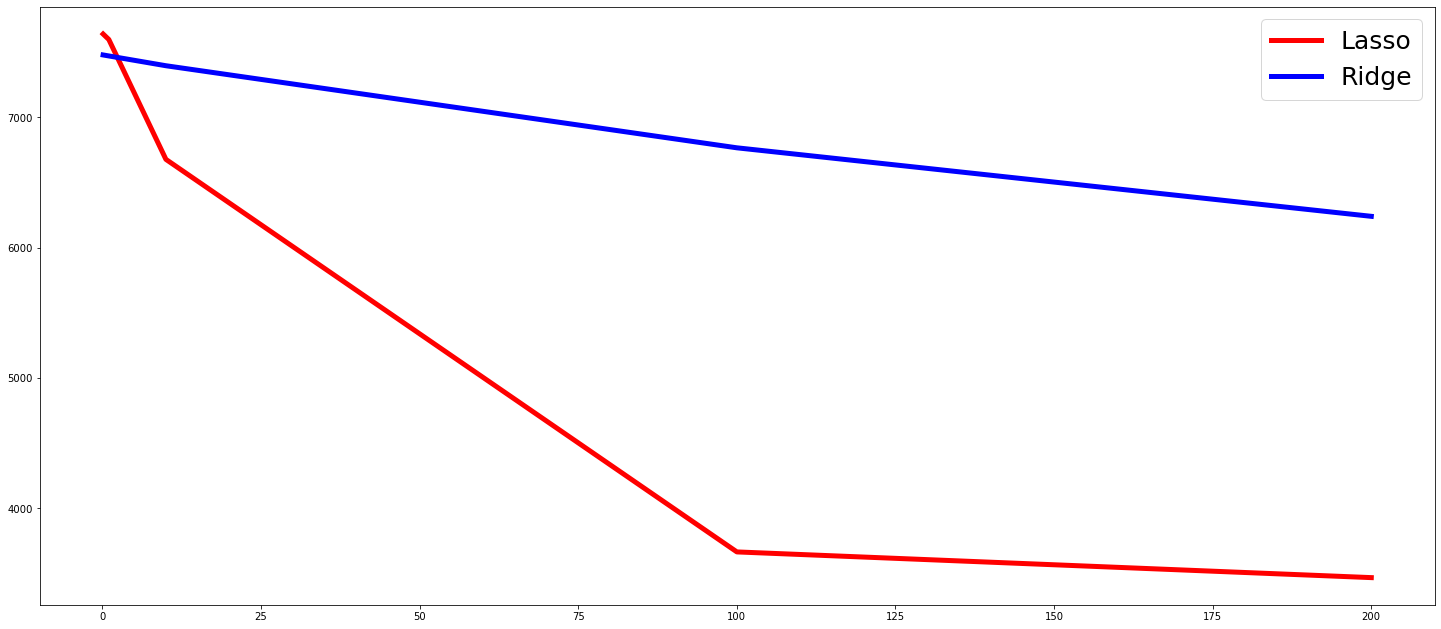

In [25]:
w_lasso = []
w_ridge = []
alphas = [0.1, 1, 10, 100, 200]
for each in alphas:
    lasso = Lasso(alpha=each)
    lasso.fit(f_train_transformed, a_train)
    w_lasso.append(np.linalg.norm(lasso.coef_))
    ridge = Ridge(alpha=each)
    ridge.fit(f_train_transformed, a_train)
    w_ridge.append(np.linalg.norm(ridge.coef_))
plt.figure(figsize=(25,11))
plt.plot(alphas, w_lasso, c='r', linewidth=5, label='Lasso')
plt.plot(alphas, w_ridge, c='b', linewidth=5, label='Ridge')
plt.legend(fontsize=25)


**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [26]:
from sklearn.linear_model import LassoCV
lscv = LassoCV(alphas=np.array([0.1, 1, 10, 100, 200]), cv=5)
lscv.fit(f_train_transformed, a_train)
mn = lscv.mse_path_.mean(axis=0)
mat_means = pd.DataFrame(columns=lscv.alphas_, data=mn.reshape(1, 5))
mat_means.T

,0
200.0,1.660507e+06
100.0,1.675401e+06
10.0,1.563782e+06
1.0,1.716003e+06
0.1,1.790584e+06


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

В регрессии Лассо оказалось, что есть абсолютно не информативные признаки: 
у, cut_Premium, cut_Very Good, color_G 
К тому же некоторые признаки имеют очень низкие коэффициенты относительно большинства, например, зет 
Это могло произойти потому что не смотря на наличие этих признаков, они не сказываются на цене бриллиантов

In [27]:
lasso = Lasso(alpha=10)
lasso.fit(f_train_transformed, a_train)

print(pd.DataFrame(lasso.coef_, F.columns))


                         0
carat          4872.112367
depth           -95.976359
table           -70.573546
x              -708.584857
y                -0.000000
z               -66.881035
cut_Fair       -420.513774
cut_Good        -26.171312
cut_Ideal        95.161620
cut_Premium       0.000000
cut_Very Good     0.000000
color_D         310.826854
color_E         167.532876
color_F         105.642647
color_G           0.000000
color_H        -426.522470
color_I        -866.466423
color_J       -1657.271976
clarity_I1    -3560.963644
clarity_IF      628.533610
clarity_SI1    -617.587947
clarity_SI2   -1523.438987
clarity_VS1     151.311810
clarity_VS2     -15.676016
clarity_VVS1    512.314915
clarity_VVS2    501.095863


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [29]:
a_test_pred = lasso.predict(f_test_transformed)
print('MSE test: {:.3f}'.format(
        mean_squared_error(a_test, a_test_pred)))

MSE test: 1378958.462


ОТВЕТ:
Среднеквадратичная ошибка снизилась, поэтому эту модель использовать лучше, чем обычную 
Это происходит потому что обычная модель учитывает признаки, которые не влияют на цену, а также потому что
кроссвалидация помогает еще снизить уровень ошибок.